# Deutsch algorithm

In [69]:
%%javascript
//Setup to prevent auto-scroll output 
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// See for more: 
// https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling

<IPython.core.display.Javascript object>

In [70]:
# Python analog for the above 
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def load_ipython_extension(ip):
    display(Javascript(disable_js))
    print ("Autoscrolling output disabled!!")
load_ipython_extension(1)

<IPython.core.display.Javascript object>

Autoscrolling output disabled!!


In [71]:
import random
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

### <font color='indigo'>-- Create the oracle</font>

A quantum oracle $\hat{O}_f$ works as a blackbox for the reversible 
unitary operation: $\hat{O}_f  |{y,x}\rangle = |{y \oplus f(x), x}\rangle$. 
The construction of the oracle (selection of gates) can be done by following the table below.

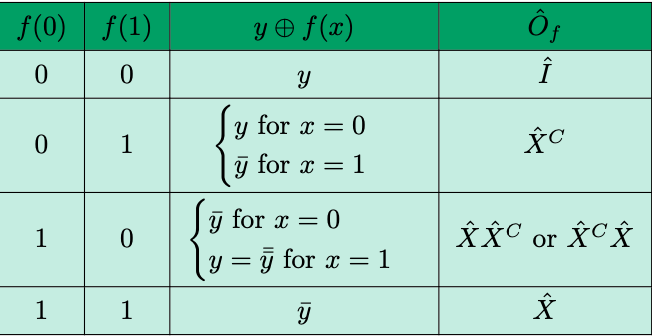

In [72]:
# Create the oracle implementing the unknown function
def make_oracle(f):
    """
    Creates an oracle for the Deutsch problem.

    Args:
        f(list): The unknown function [f(0), f(1)].

    Returns:
        QuantumCircuit: The oracle circuit.
    """
    
    oracle = QuantumCircuit(2)
    
    if  f[0]:  # if f(0) = 1 
        oracle.cx(0, 1) 
        oracle.x(1)   # then O_f = X_c X
    if  f[1]:  # if f(1) = 1 
        oracle.cx(0, 1) # then O_f = X_c if f[0] = 0
                        # then O_f = X = X_c X X_c if f[0] = 1
                        # above statement takes care of both situations
    return oracle

### <font color='indigo'>-- Create Deutsch circuit</font>

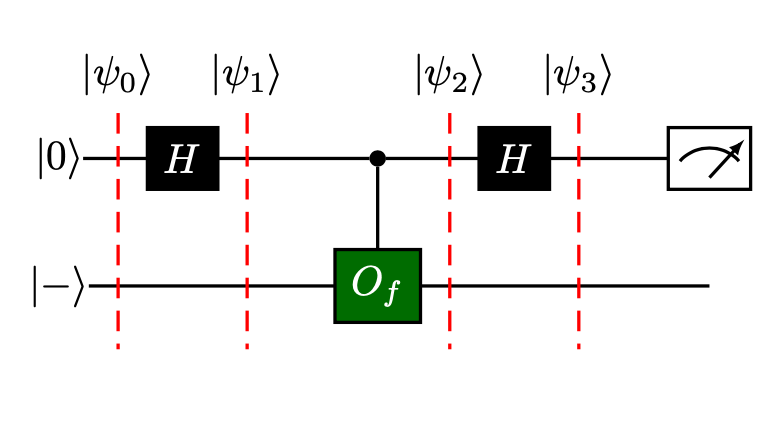
<!--<div> 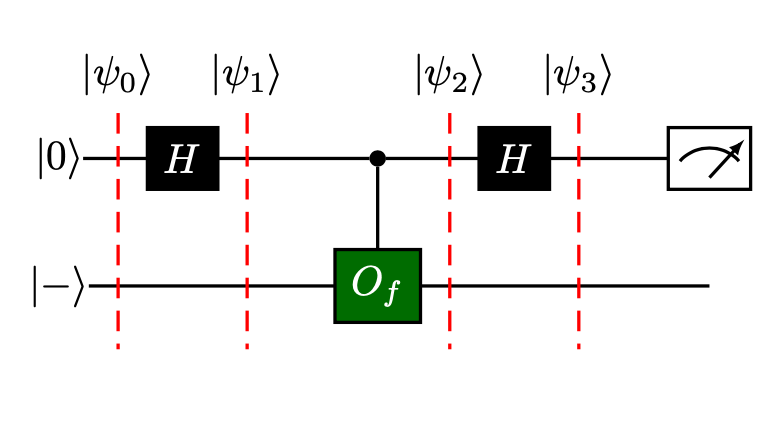</div>--> 


In [73]:
# Create the Deutsch circuit that uses the oracle
def make_deutsch_circuit(f):
    """
    Creates the Deutsch algorithm circuit.

    Args:
        f(list): The unknown function [f(0), f(1)].

    Returns:
        QuantumCircuit: The Deutsch algorithm circuit.
    """
    qc = QuantumCircuit(2, 1)

    # Initialize qubits
    qc.x(1)  # Set the second qubit to | 1 >
    qc.h(0)  # Creates state | + >
    qc.h(1) # Creates state | - >

    # Query oracle
    oracle = make_oracle(f)
    qc.compose(oracle, inplace=True)

    # Apply Hadamard gate to the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)
    display(qc.draw('mpl'))
    return qc

### <font color='indigo'>-- Implement Deutsch circuit with the oracle and simulate</font>

Unknown function, f(x) = [1, 1]  for x in {0,1}.


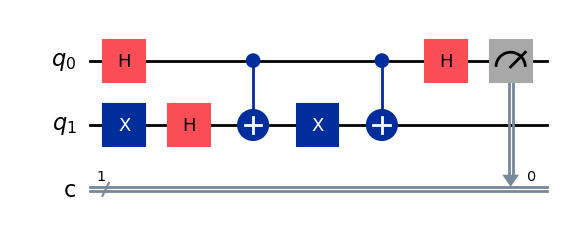

Counts = {'0': 10} ; No of shots = 10
Measurement results: {'0': 10}


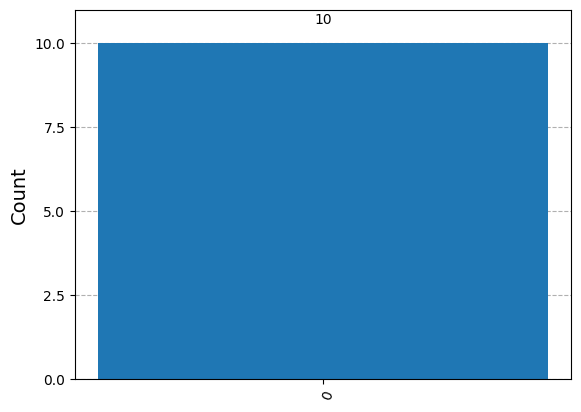

Result_key = 0
Circuit:
     ┌───┐                    ┌───┐┌─┐
q_0: ┤ H ├───────■─────────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├──────╫─
     └───┘└───┘└───┘└───┘└───┘      ║ 
c: 1/═══════════════════════════════╩═
                                    0 
f(0)⊕f(1) = 0
The function is CONSTANT


In [74]:
# Main function to simulate Deutsch's algorithm
def main():
    
    # Generate a random unknown function
    f_test = [random.randint(0, 1) for _ in range(2)]
    #f_test = [0, 0] # f(0)=0, f(1)=0 , i.e. CONSTANT f
    #f_test = [1,1] #  f(0)=1, f(1)=0 , i.e. BALANCED f
    print('Unknown function, f(x) =',f_test,' for x in {0,1}.')
    
    
    # Create the Deutsch algorithm circuit
    deutsch_circuit = make_deutsch_circuit(f_test)
    
    # Simulate the circuit
    nshot = 10
    simulator = AerSimulator()
    transpiled_circuit = transpile(deutsch_circuit, simulator)
    result = simulator.run(transpiled_circuit, shots=nshot).result()
    
    # Collect counts
    counts = result.get_counts()
    print('Counts =',counts,'; No of shots =',nshot)
    
    # Visualize the results
    print("Measurement results:", counts)
    #plt.figure(figsize=(4, 3))
    hist = plot_histogram(counts)
    display(hist)
    
    #result_key = max(counts, key=counts.get)
    result_key = list(counts.keys())[0] 
    print('Result_key =',result_key)
    # Print results
    #print(f"Unknown function: f(x) = [{', '.join(map(str, f_test))}]")
    print("Circuit:")
    print(deutsch_circuit)
    print(f"f(0)⊕f(1) = {result_key}")
    
    if int(result_key) == 0:   
     print('The function is CONSTANT')
    else:
     print('The function is BALANCED')   

# Execute the main function
main()